<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [1]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2024-01-11 at 22:28:25


In [3]:
!pip3 install matplotlib

### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [4]:
#from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, META, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [5]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','META','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG'
           ,'YELP','ZM','VMW', 'DBX', 'ADBE']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

#### Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [6]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2024-01-04    370.670013  373.100006  367.170013  367.940002  367.940002   
2024-01-05    368.970001  372.059998  366.500000  367.750000  367.750000   
2024-01-08    369.299988  375.200012  369.010010  374.690002  374.690002   
2024-01-09    372.010010  375.989990  371.190002  375.790009  375.790009   
2024-01-10    376.369995  384.170013  376.320007  382.769989  382.769989   

Stock Ticker                  AAPL                                      ...  \
Stock Info      Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2024-01-04    20901500  182.149994  183.089996  180.880005  181.910004  ...   
2024-01-05    20987000  181.990005  182.759995  180.169998  181.179993  ...   
2024-01-08    23134000  182.089996  185.600006  181.500000  185.559998  ...   
2024-01-09    20830000  183.919998  185.149994  182.729996  185.139999  ...   
2024-01-10    25514200  184.350006  186.399994  183.919998  186.190002  ...   

Stock Ticker        DBX                                         ADBE  \
Stock Info          Low      Close  Adj Close     Volume        Open   
Date                                                                   
2024-01-04    28.520000  28.600000  28.600000  3104200.0  570.989990   
2024-01-05    28.629999  29.160000  29.160000  2755400.0  563.500000   
2024-01-08    29.129999  29.830000  29.830000  2107500.0  567.869995   
2024-01-09    29.360001  29.670000  29.670000  3025900.0  578.330017   
2024-01-10    29.059999  30.209999  30.209999  1820100.0  585.429993   

Stock Ticker                                                           
Stock Info          High         Low       Close   Adj Close   Volume  
Date                                                                   
2024-01-04    572.909973  566.659973  567.049988  567.049988  2092100  
2024-01-05    569.520020  563.340027  564.599976  564.599976  1922900  
2024-01-08    581.510010  567.869995  580.549988  580.549988  2830000  
2024-01-09    588.200012  577.280029  586.200012  586.200012  1926900  
2024-01-10    593.650024  585.429993  591.030029  591.030029  2135700  

[5 rows x 126 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

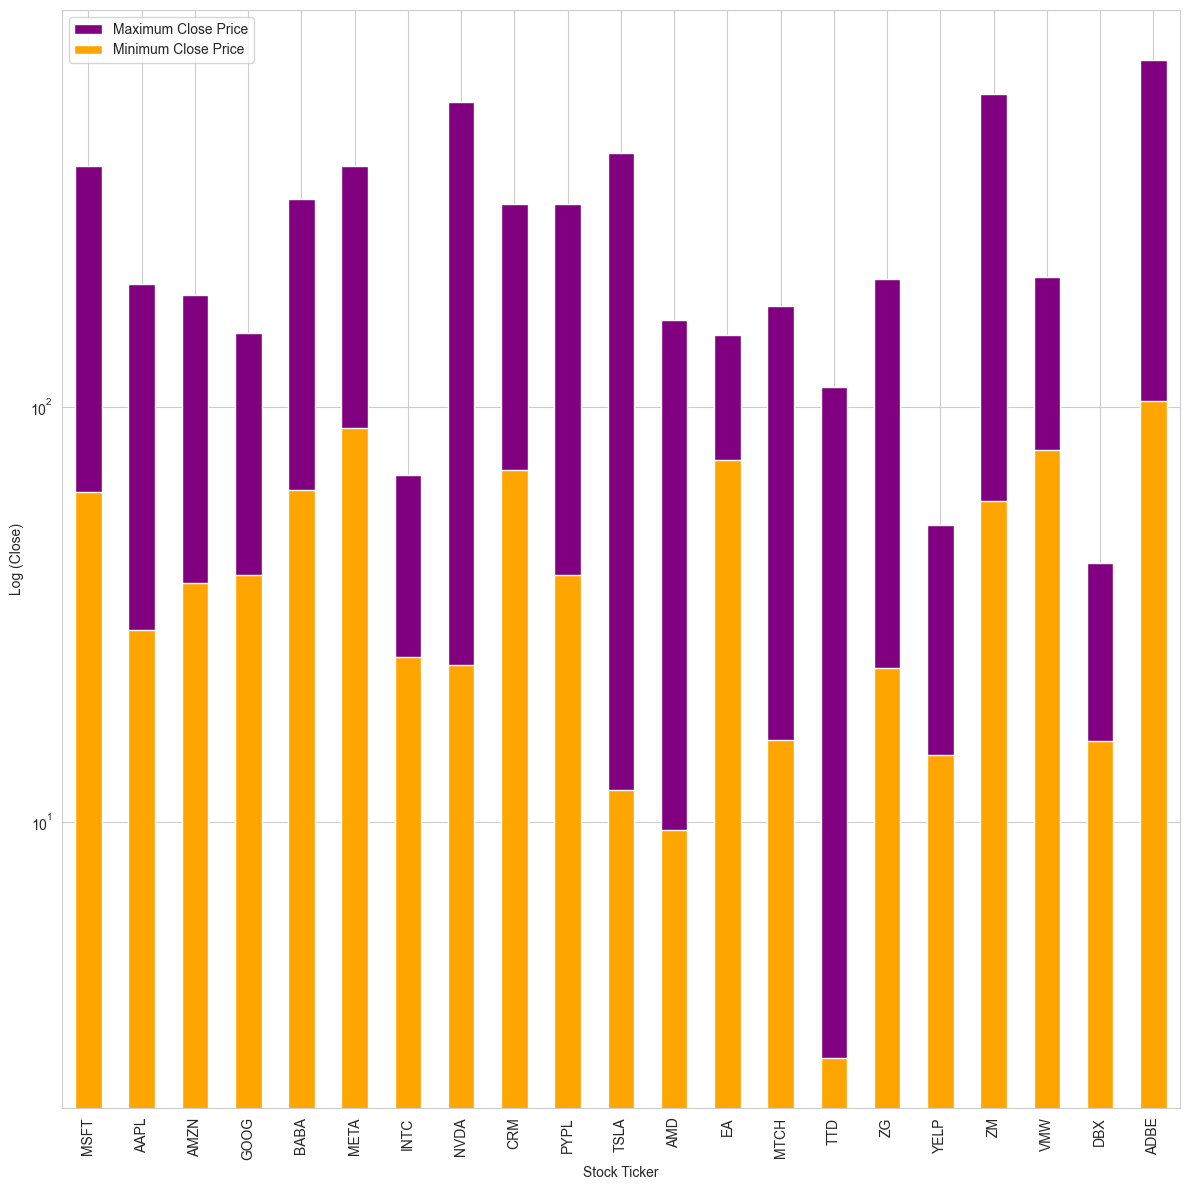

In [7]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TSLA

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Dec 2020')

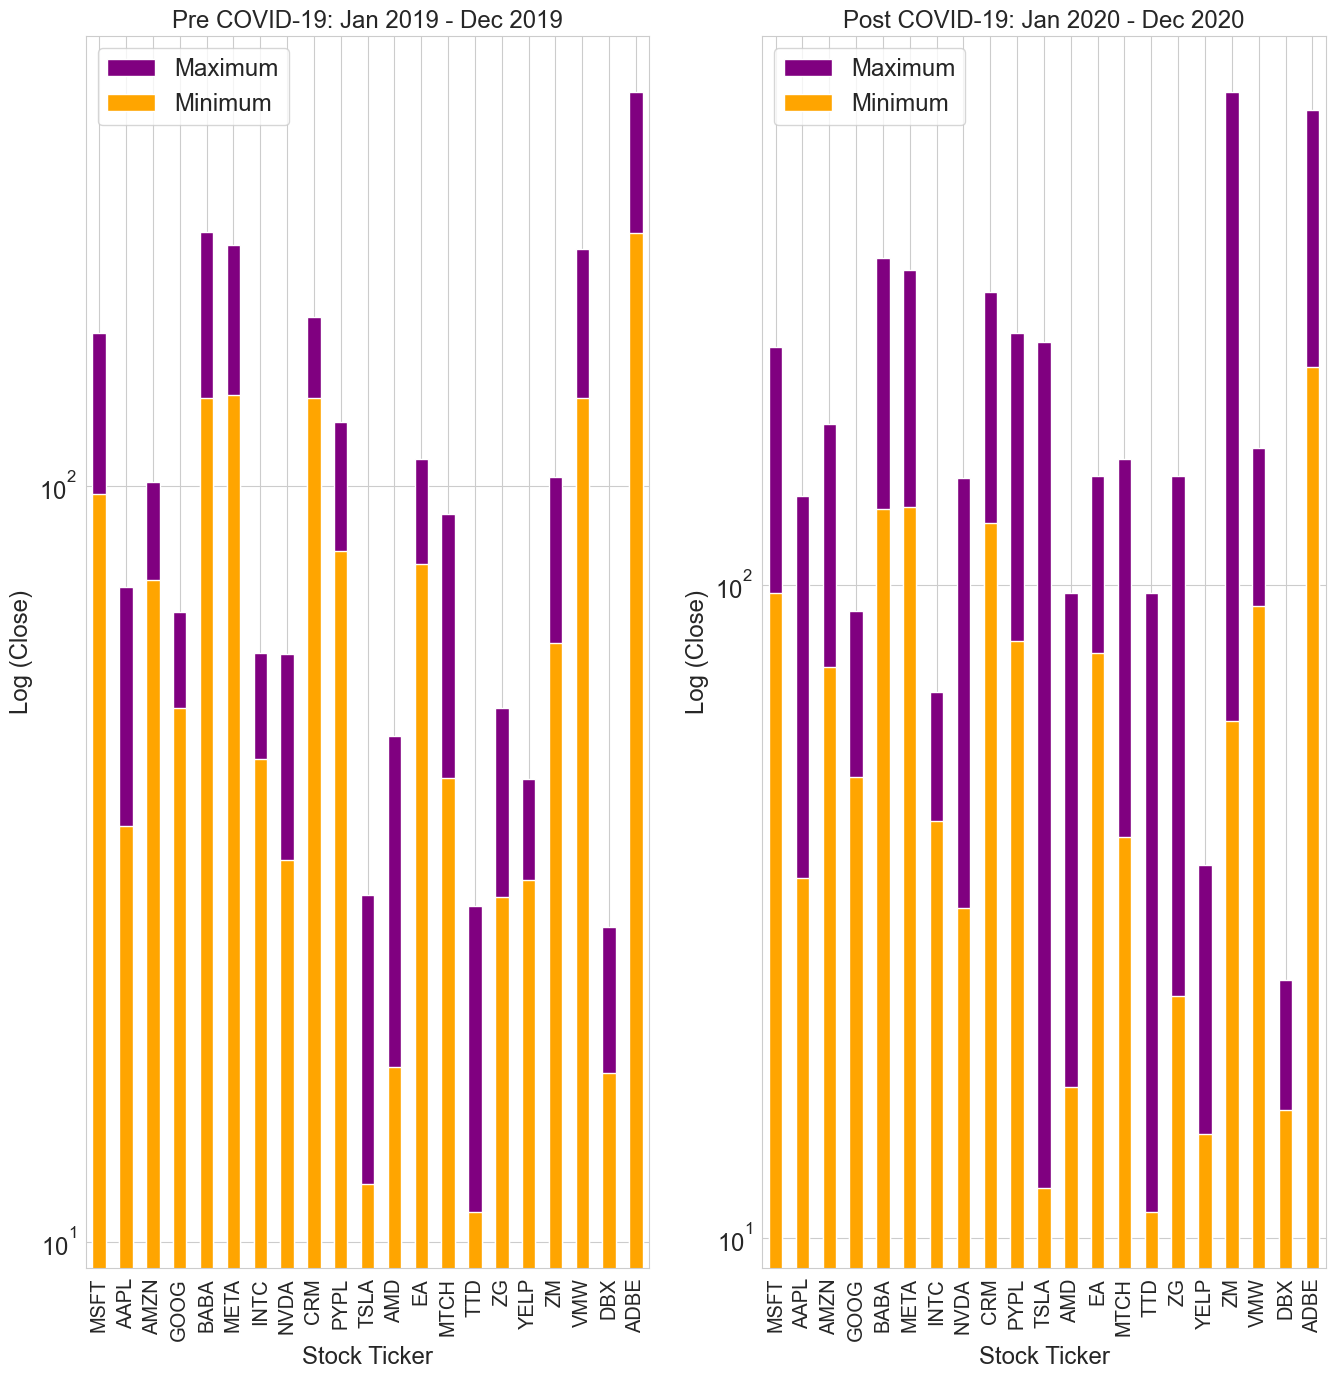

In [8]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Jan 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':'2020-12-31'].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':'2020-12-31'].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Dec 2020')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [9]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

/var/folders/4v/4jl2w__11qb1v0zxlw_znyxc0000gr/T/ipykernel_6299/1411117124.py:3: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,META Return,INTC Return,NVDA Return,CRM Return,PYPL Return,...,AMD Return,EA Return,MTCH Return,TTD Return,ZG Return,YELP Return,ZM Return,VMW Return,DBX Return,ADBE Return
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-04,-0.007178,-0.012700,-0.026268,-0.016529,-0.025199,0.007693,-0.003826,0.009018,-0.002382,-0.003070,...,0.005099,0.001916,0.014083,-0.013272,-0.022786,0.002825,-0.004020,0.0,-0.014133,-0.008290
2024-01-05,-0.000516,-0.004013,0.004634,-0.004709,-0.022100,0.013915,0.000427,0.022897,-0.000478,0.028571,...,0.018896,-0.002648,0.008662,-0.011111,-0.006066,-0.025358,0.000897,0.0,0.019580,-0.004321
2024-01-08,0.018872,0.024175,0.026577,0.022855,-0.001781,0.019065,0.033269,0.064281,0.038826,0.026946,...,0.054842,0.006268,0.032988,0.019959,0.041007,0.016011,0.021356,0.0,0.022977,0.028250
2024-01-09,0.002936,-0.002263,0.015225,0.014445,-0.011800,-0.003429,-0.008256,0.016975,0.001802,-0.011176,...,0.021070,0.009233,0.030351,-0.007827,-0.004214,-0.016634,-0.001170,0.0,-0.005364,0.009732
2024-01-10,0.018574,0.005671,0.015591,0.008698,-0.008470,0.036483,-0.012071,0.022770,0.010676,-0.001474,...,-0.004824,-0.000653,-0.006660,0.000438,-0.019687,-0.012241,-0.001903,0.0,0.018200,0.008240


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [10]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2022-04-29
GOOG Return   2020-03-16
BABA Return   2020-12-24
META Return   2022-02-03
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2022-02-02
TSLA Return   2020-09-08
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2021-05-10
ZG Return     2018-11-07
YELP Return   2018-11-09
ZM Return     2020-11-09
VMW Return    2018-01-29
DBX Return    2019-08-09
ADBE Return   2022-09-15
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [21]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2022-02-04
GOOG Return   2019-07-26
BABA Return   2022-03-16
META Return   2023-02-02
INTC Return   2020-03-13
NVDA Return   2023-05-25
CRM Return    2020-08-26
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
YELP Return   2017-08-04
ZM Return     2020-09-01
VMW Return    2022-05-23
DBX Return    2020-02-21
ADBE Return   2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

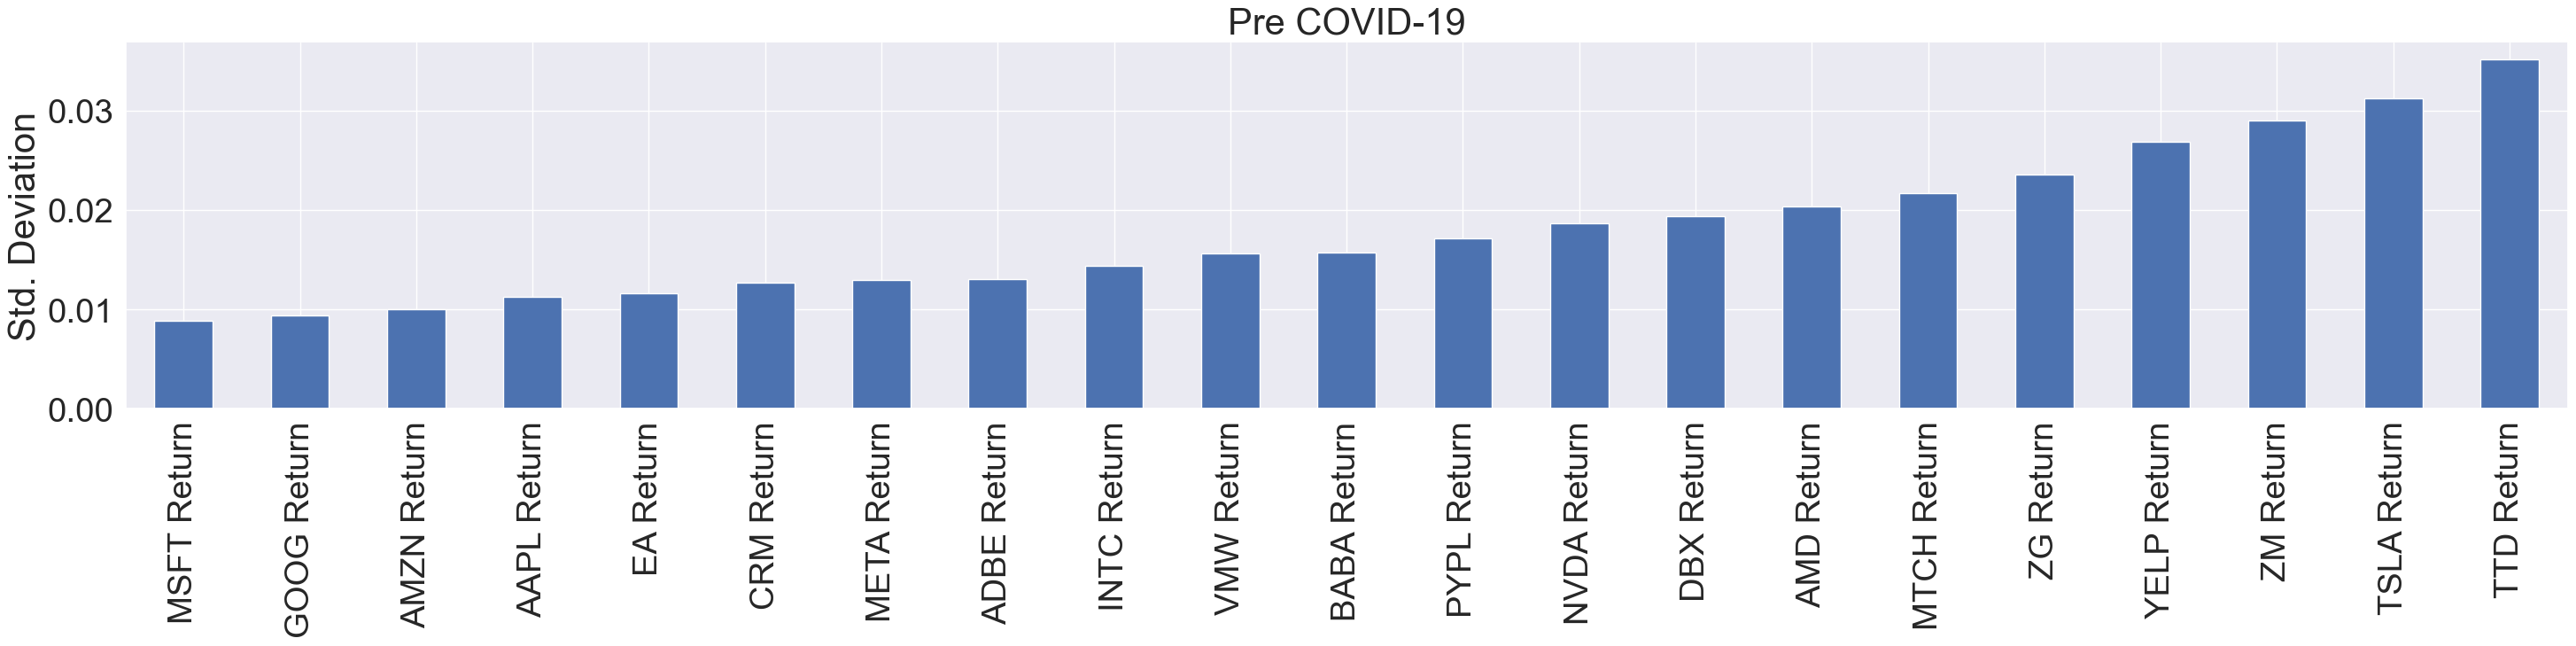

In [12]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

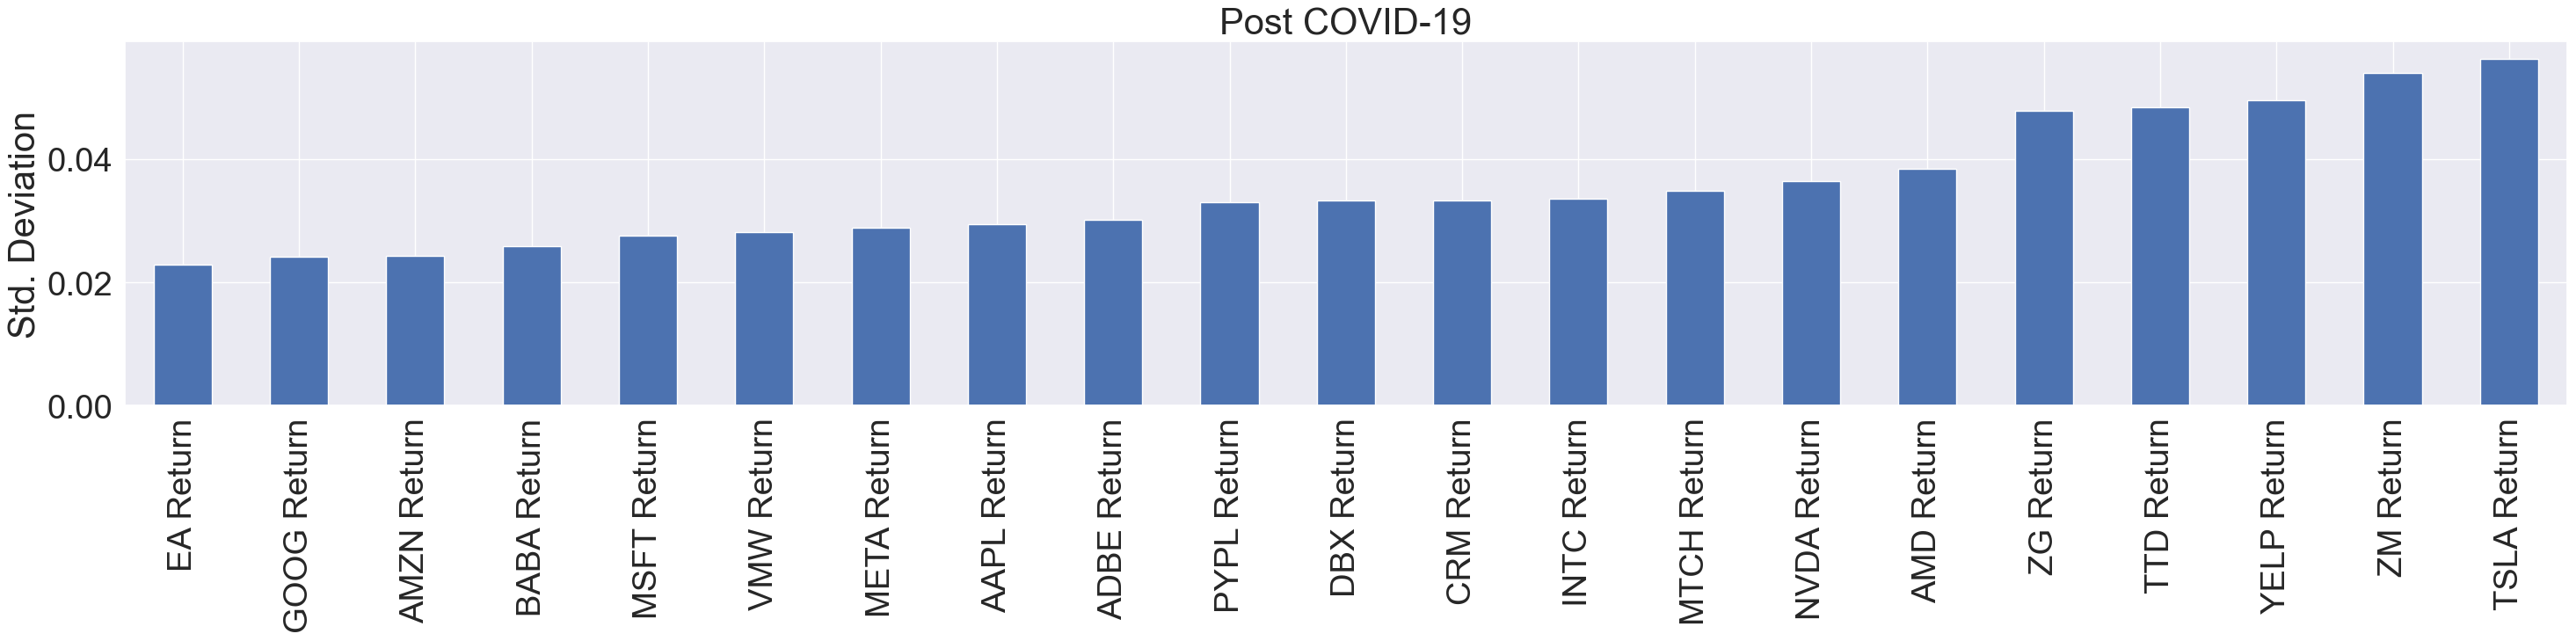

In [13]:
post_corona=returns.loc['2020-01-01':'2020-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

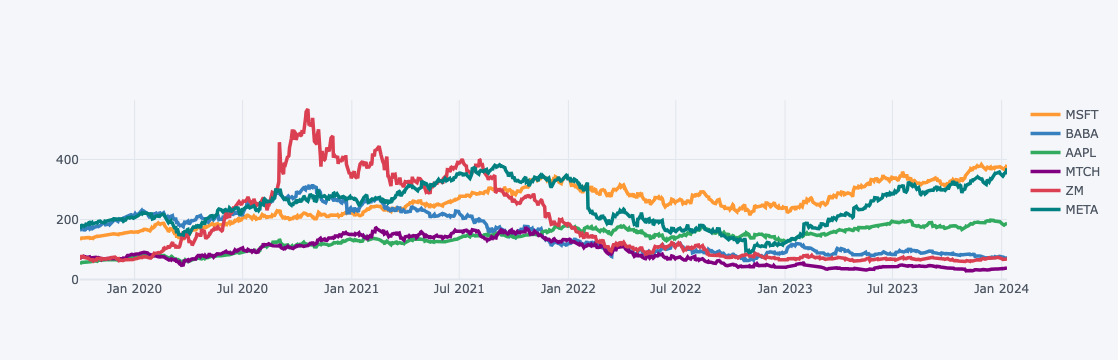

In [14]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM','META']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM'],df_map['META']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

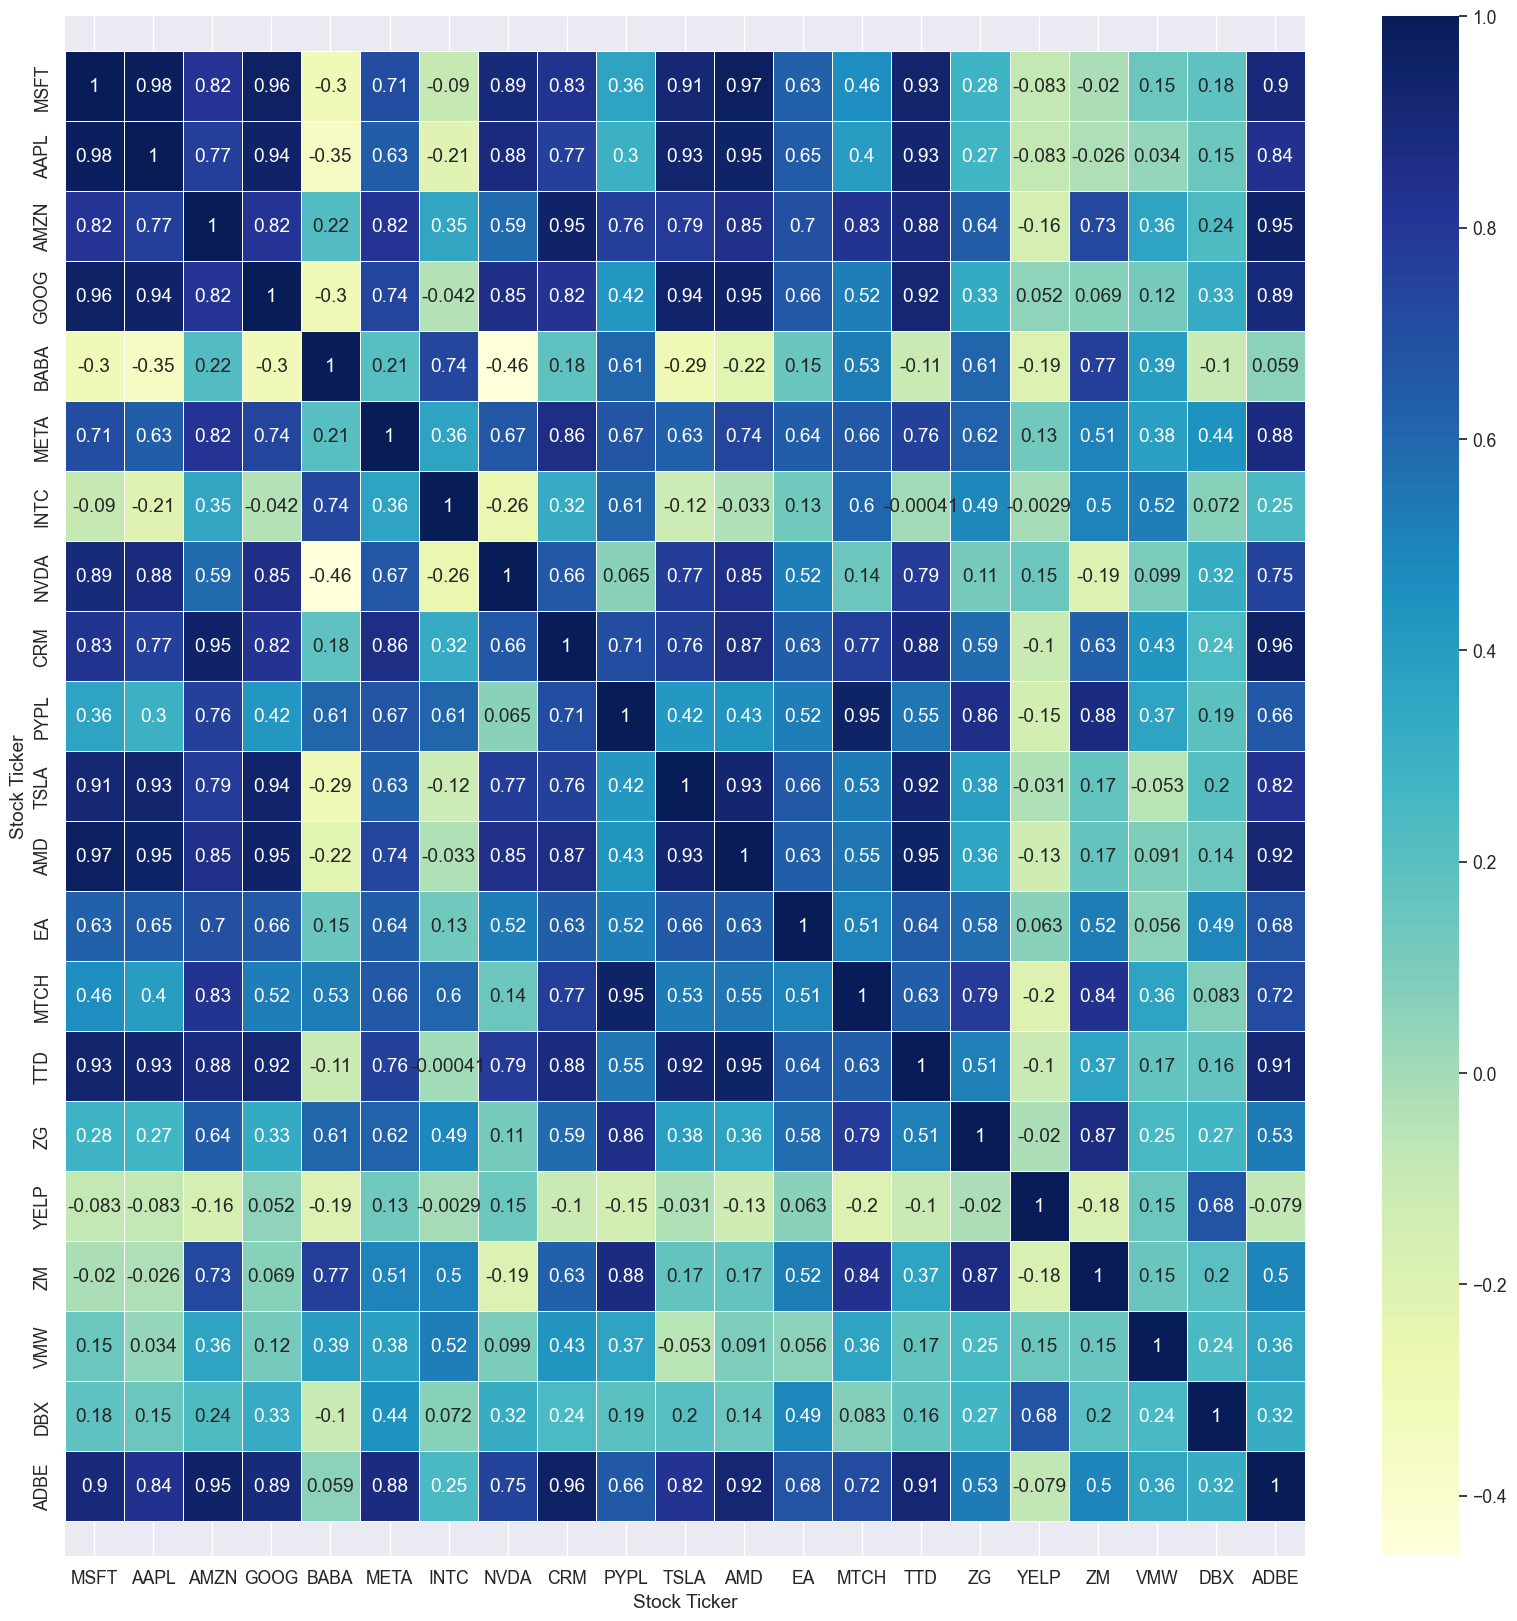

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='YlGnBu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()

### Comparison in some "Tech-giant" stocks before and after layoffs

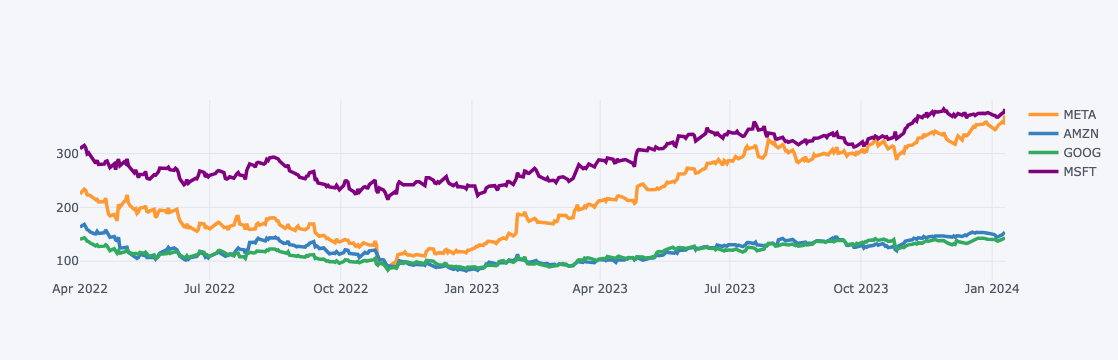

In [16]:
selected_tickers_compare = ['META','AMZN','GOOG','MSFT']
selected_tech_stocks_compare = pd.concat([df_map['META'],df_map['AMZN'],df_map['GOOG'],df_map['MSFT']],axis=1,keys=selected_tickers_compare)
selected_tech_stocks_compare.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks_compare.xs(key='Close',axis=1,level='Stock Info').loc['2022-04-01':current_date_str].iplot(width=3.5)